In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk("winequality-red.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Libraries we will use

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('C:/Users/Admin/Desktop/Downloads/Unemployment/winequality-red.csv')
df = data.copy()
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [4]:
# Let's see the number of rows and columns of the dataset.

df.shape

(1599, 12)

In [5]:
# Information about dataset.
# we see that all data is numerical.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# missing data check

df.isnull().sum().sum()

0

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

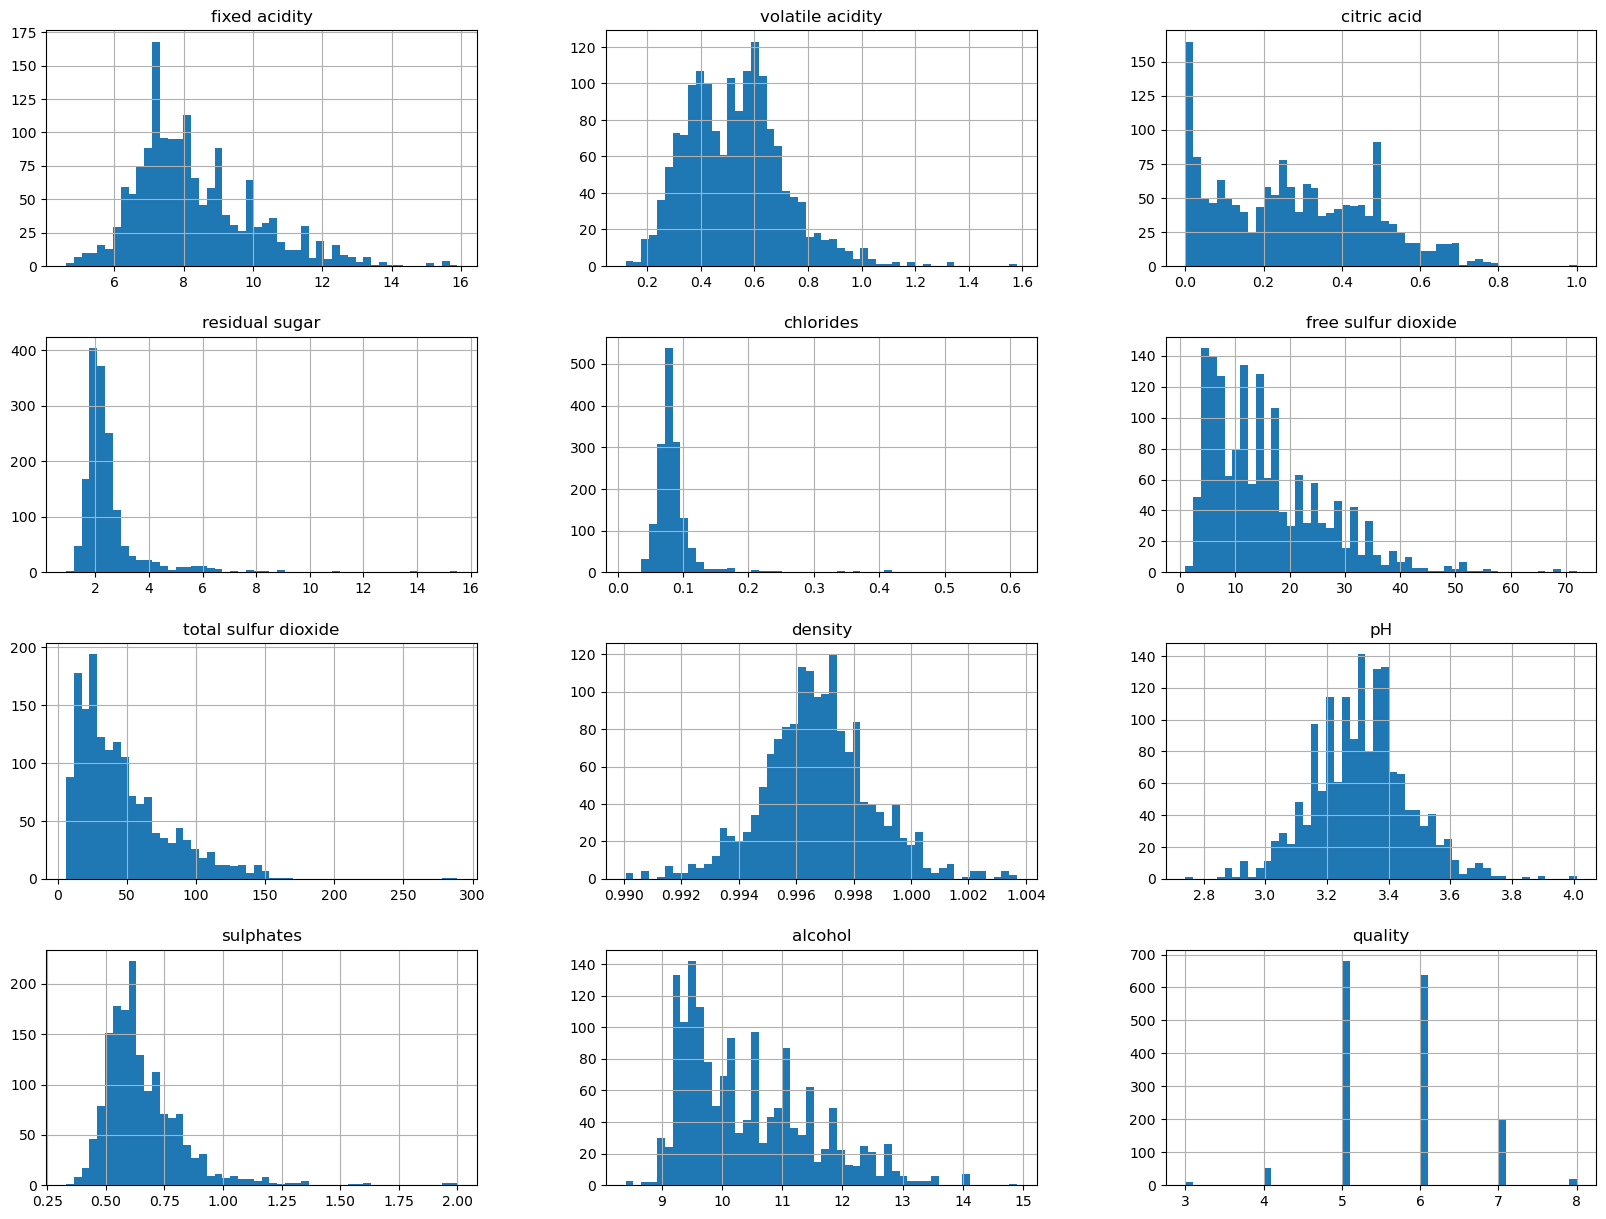

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

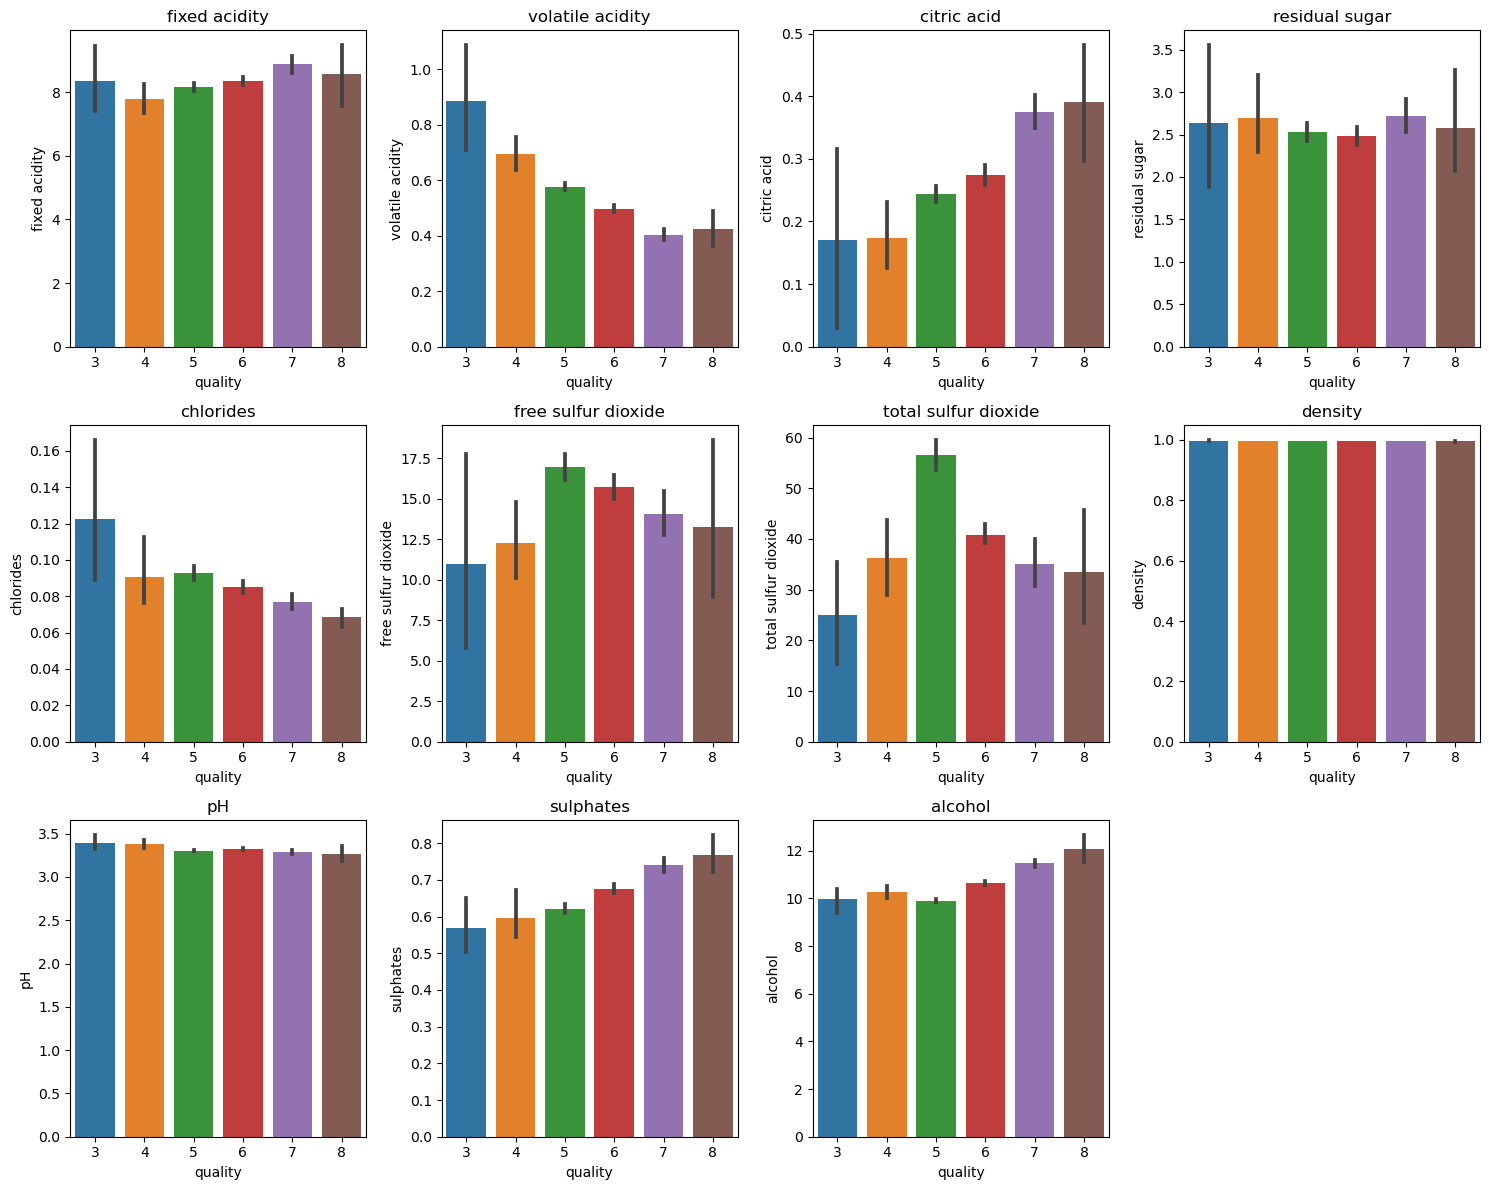

In [10]:
# Column names
columns = df.columns.drop('quality')

num_cols = 4
num_rows = (len(columns) - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    sns.barplot(x='quality', y=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(column)

for i in range(len(columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [11]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

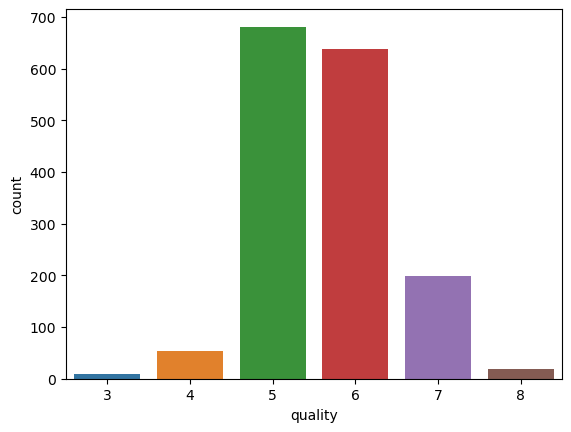

In [12]:
sns.countplot(x="quality", data=df);

In [13]:
pd.concat({"Unique values" : df.apply(pd.unique), "Num" : df.nunique()}, axis=1)

,Unique values,Num
fixed acidity,"[7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,...",96
volatile acidity,"[0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58,...",143
citric acid,"[0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29...",80
residual sugar,"[1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ...",91
chlorides,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0...",153
free sulfur dioxide,"[11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0...",60
total sulfur dioxide,"[34.0, 67.0, 54.0, 60.0, 40.0, 59.0, 21.0, 18....",144
density,"[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,...",436
pH,"[3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35,...",89
sulphates,"[0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8...",96


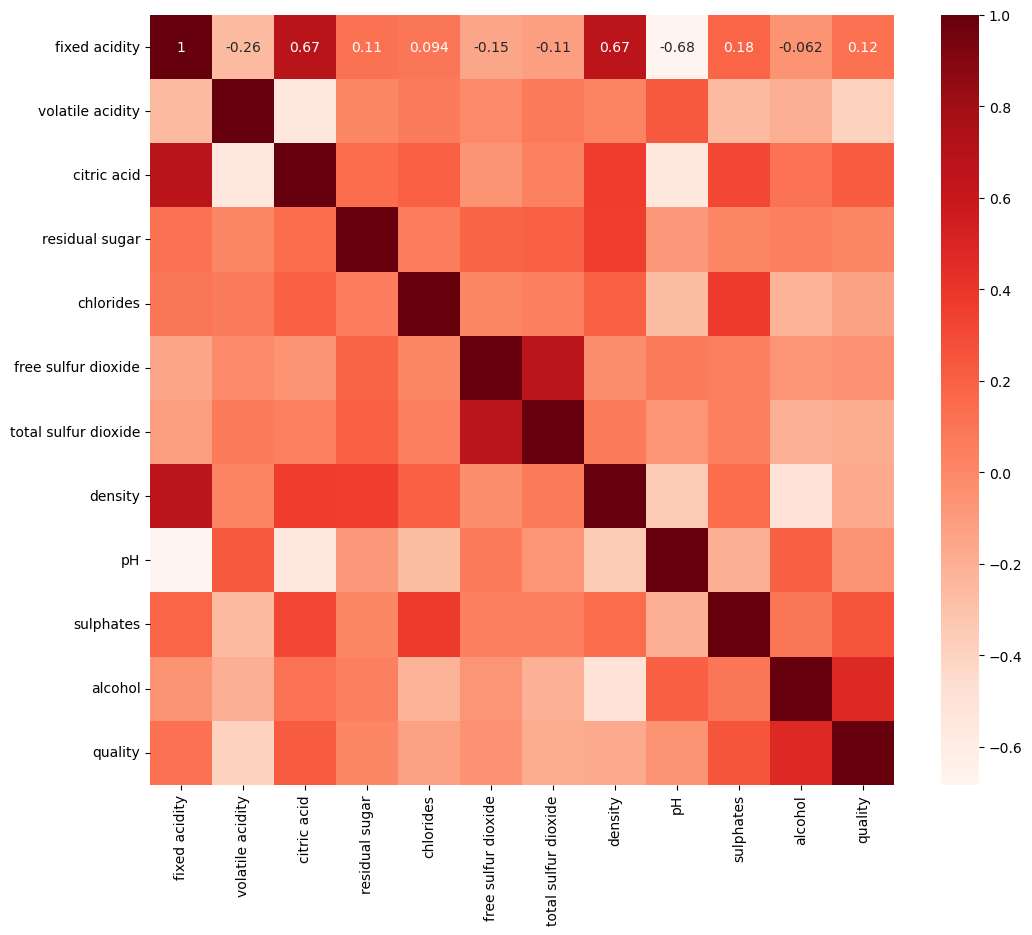

In [14]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show;

In [15]:
df.corr(numeric_only=True)["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [16]:
# I classify wine quality as good and bad

# 0 = bad / 1 = good
map_legend = {
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 1,
    8 : 1
}

df["quality"] = df["quality"].map(map_legend)

In [17]:
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

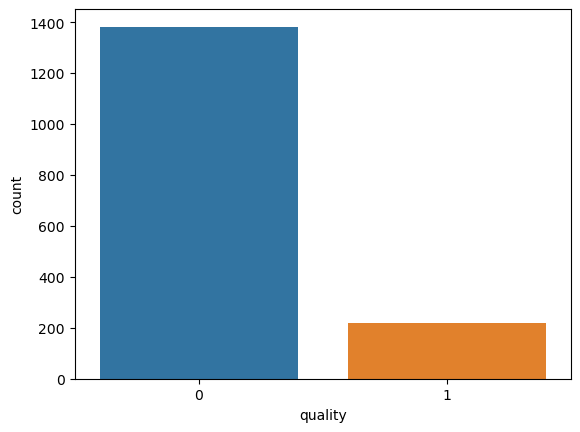

In [18]:
sns.countplot(x="quality", data=df);

In [19]:
# I separate the target variable and other variables
X = df.drop("quality", axis=1)
y = df["quality"]

# I divide the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)


# Scaling the data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# let's see the latest data quantities
print("X_train_scaled shape:",X_train.shape)
print("X_test_scaled shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train_scaled shape: (1279, 11)
X_test_scaled shape: (320, 11)
y_train shape: (1279,)
y_test shape: (320,)


In [20]:
dict_accuracy_score = {}

In [24]:
rfc = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': range(100, 1001, 100), 
    'max_depth': [None, 10, 20, 30],    
}

# Training
rfc_g = GridSearchCV(estimator = rfc, param_grid = param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

rfc_g.fit(X_train_scaled, y_train)

# Best parameters
best_params = rfc_g.best_params_
print("Best parameters:", best_params)

Best parameters: {'max_depth': 10, 'n_estimators': 600}


In [25]:
pred_rfc_g = rfc_g.predict(X_test_scaled)
print(classification_report(y_test, pred_rfc_g))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       288
           1       0.67      0.44      0.53        32

    accuracy                           0.92       320
   macro avg       0.80      0.71      0.74       320
weighted avg       0.91      0.92      0.91       320



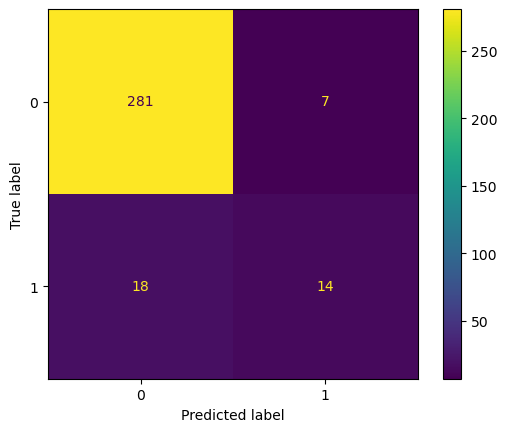

In [27]:
# Confusion matrix

ConfusionMatrixDisplay.from_estimator(rfc_g, X_test_scaled, y_test);

In [28]:
# Accuracy score

accuracy = accuracy_score(y_test, pred_rfc_g)
print("Ran. For. Grid Accuracy:", accuracy)

Ran. For. Grid Accuracy: 0.921875


In [30]:
dict_accuracy_score["Ran. For. Gird Accuracy"] = accuracy

## SVM (Support Vector Machine)


In [31]:
svm = SVC(random_state=123)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']    
}

# Training
svm_g = GridSearchCV(estimator = svm, param_grid = param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

svm_g.fit(X_train_scaled, y_train)

# Best parameters
best_params = svm_g.best_params_
print("Best parameters:", best_params)

Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [32]:
pred_svm_g = svm_g.predict(X_test_scaled)
print(classification_report(y_test, pred_svm_g))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       288
           1       0.85      0.34      0.49        32

    accuracy                           0.93       320
   macro avg       0.89      0.67      0.73       320
weighted avg       0.92      0.93      0.91       320



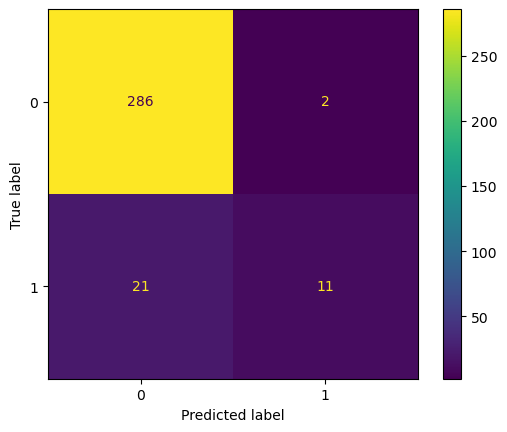

In [33]:
# Confusion matrix

ConfusionMatrixDisplay.from_estimator(svm_g, X_test_scaled, y_test);

In [34]:
accuracy = accuracy_score(y_test, pred_svm_g)
print("SVM Grid Accuracy:", accuracy)

SVM Grid Accuracy: 0.928125


In [35]:
dict_accuracy_score["SVM Grid Accuracy"] = accuracy

In [36]:
df_accuracy = pd.DataFrame.from_dict(dict_accuracy_score,orient = "index",columns=["Accuracy Score"])
df_accuracy

,Accuracy Score
Ran. For. Gird Accuracy,0.921875
SVM Grid Accuracy,0.928125
